In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 8
fig_height = 5
fig_format = 'png'
fig_dpi = 200
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/development/projects/active/HIRT/docs/hirt-whitepaper/sections':
  os.chdir(r'/development/projects/active/HIRT/docs/hirt-whitepaper/sections')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/usr/lib/python3.12/importlib/_bootstrap.py": 1767871850.0, "/usr/lib/python3.12/importlib/_bootstrap_external.py": 1767871850.0, "/usr/lib/python3.12/zipimport.py": 1767871850.0, "/usr/lib/python3.12/codecs.py": 1767871850.0, "/usr/lib/python3.12/encodings/aliases.py": 1767871850.0, "/usr/lib/python3.12/encodings/__init__.py": 1767871850.0, "/usr/lib/python3.12/encodings/utf_8.py": 1767871850.0, "/usr/lib/python3.12/abc.py": 1767871850.0, "/usr/lib/python3.12/io.py": 1767871850.0, "/usr/lib/python3.12/stat.py": 1767871850.0, "/usr/lib/python3.12/_collections_abc.py": 1767871850.0, "/usr/lib/python3.12/genericpath.py": 1767871850.0, "/usr/lib/python3.12/posixpath.py": 1767871850.0, "/usr/lib/python3.12/os.py": 1767871850.0, "/usr/lib/python3.12/_sitebuiltins.py": 1767871850.0, "/usr/lib/python3/dist-packages/_distutils_hack/__init__.py": 1692360458.0, "/usr/lib/python3/dist-packages/apport_python_hook.py": 1713443495.0, "/usr/lib/python3.12/sitecustomize.py": 1712727227.0, "/usr/lib/

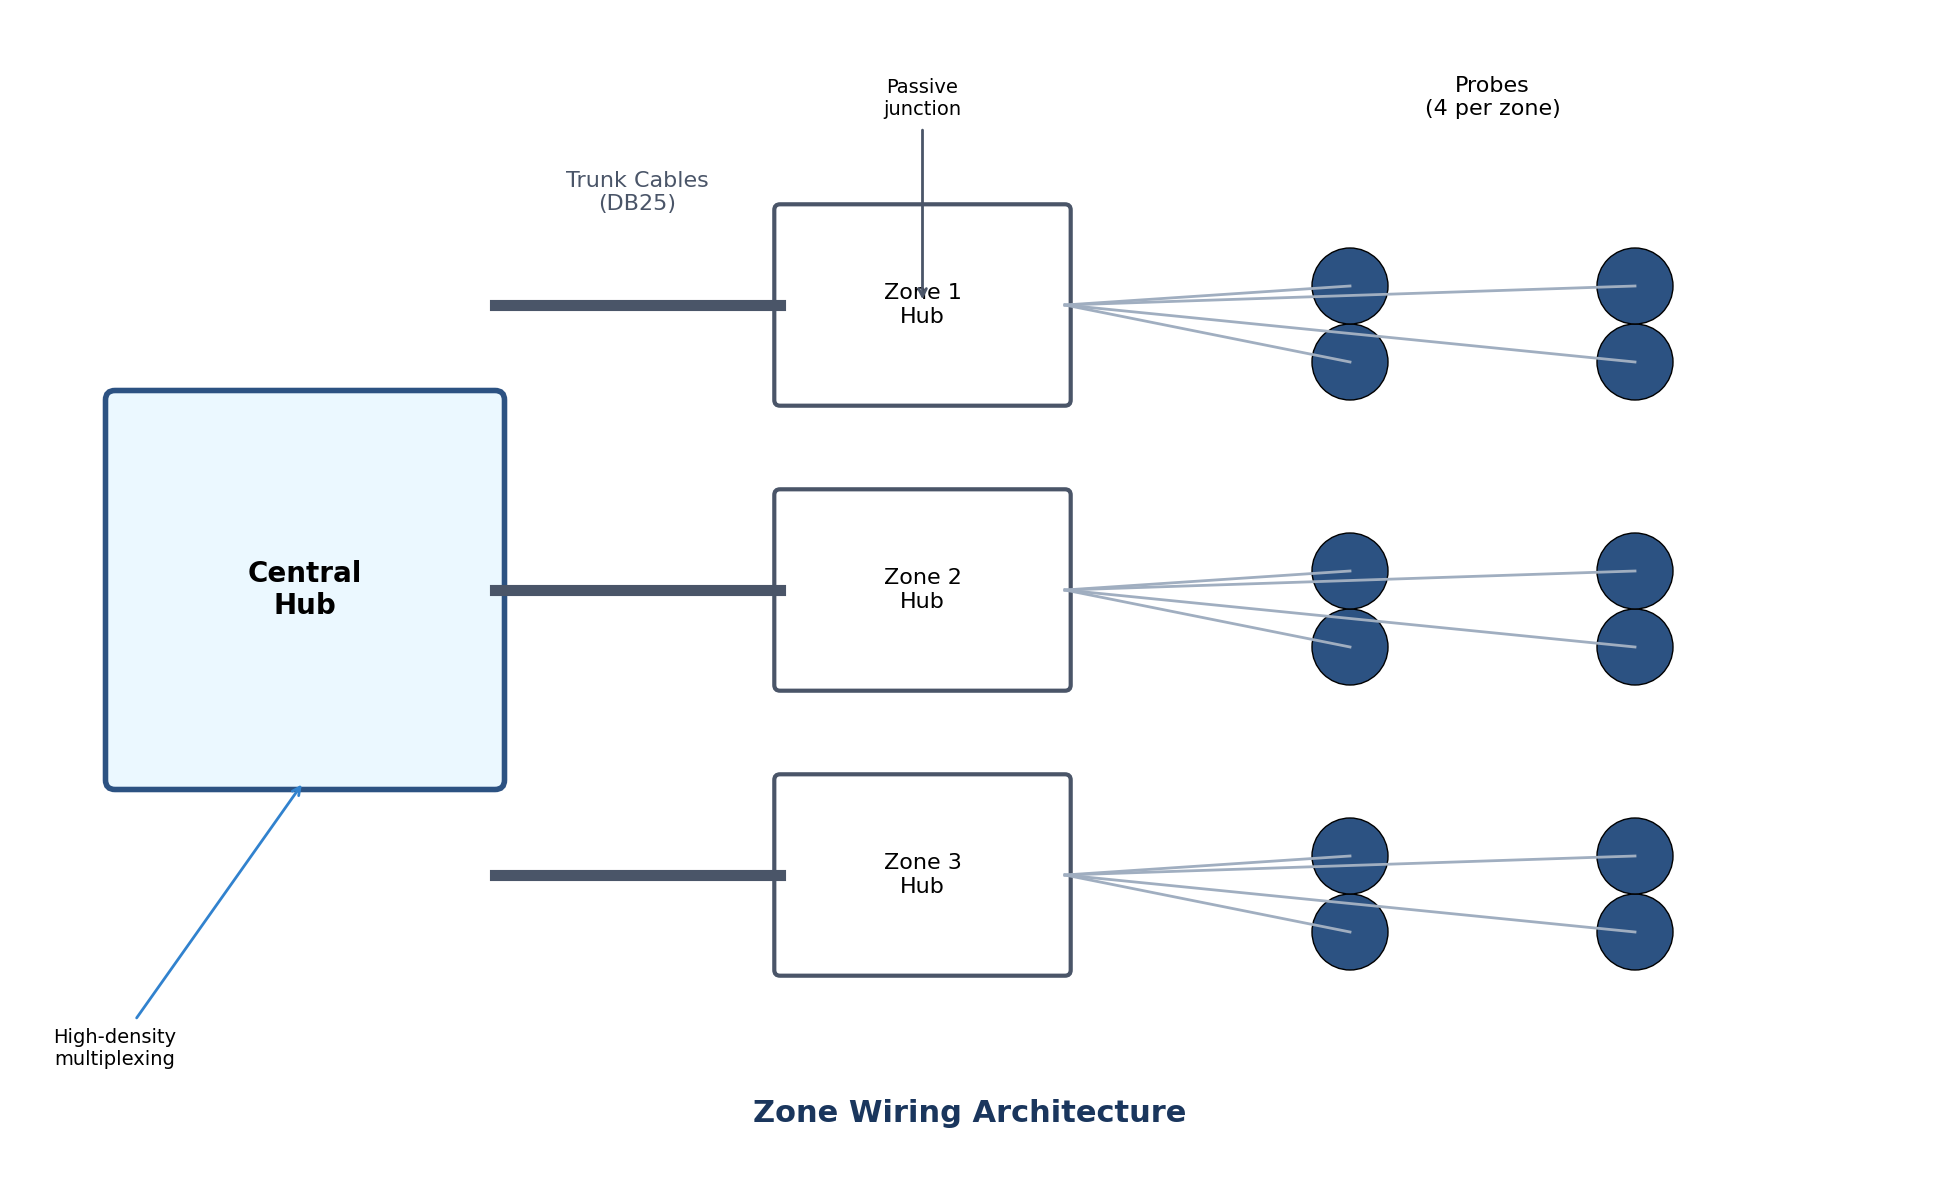

In [2]:
#| label: fig-zone-architecture
#| fig-cap: 'Zone wiring architecture showing probe groupings, zone boxes, and trunk cable routing to the central hub. Each zone aggregates 4 probes through a passive junction box.'

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, Circle, Rectangle
import numpy as np

# Color palette
COLORS = {
    'primary': '#1a365d',
    'secondary': '#2c5282',
    'accent': '#3182ce',
    'success': '#38a169',
    'warning': '#c53030',
    'gray_dark': '#4a5568',
    'gray_med': '#718096',
    'gray_light': '#a0aec0',
    'light_blue': '#ebf8ff',
}

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.set_aspect('equal')
ax.axis('off')

# Central hub
ax.add_patch(FancyBboxPatch((0.5, 2), 2.0, 2.0, boxstyle="round,pad=0.05",
                            facecolor=COLORS['light_blue'], edgecolor=COLORS['secondary'],
                            linewidth=2))
ax.text(1.5, 3, 'Central\nHub', ha='center', va='center',
       fontsize=10, fontweight='bold')

# Trunk cables
trunk_y = [4.5, 3.0, 1.5]
for y in trunk_y:
    ax.plot([2.5, 4.0], [y, y], color=COLORS['gray_dark'], lw=4)

ax.text(3.25, 5.0, 'Trunk Cables\n(DB25)', ha='center', fontsize=8,
       color=COLORS['gray_dark'])

# Zone hubs
zone_positions = [(4.0, 4.0), (4.0, 2.5), (4.0, 1.0)]
for i, (x, y) in enumerate(zone_positions):
    ax.add_patch(FancyBboxPatch((x, y), 1.5, 1.0, boxstyle="round,pad=0.03",
                                facecolor='white', edgecolor=COLORS['gray_dark'],
                                linewidth=1.5))
    ax.text(x + 0.75, y + 0.5, f'Zone {i+1}\nHub', ha='center', va='center',
           fontsize=8)

# Probe cables from each zone
for zi, (zx, zy) in enumerate(zone_positions):
    for pi in range(4):
        px = 7.0 + (pi % 2) * 1.5
        py = zy + 0.2 + (pi // 2) * 0.4
        ax.plot([zx + 1.5, px], [zy + 0.5, py], color=COLORS['gray_light'], lw=1)
        ax.add_patch(Circle((px, py), 0.2, facecolor=COLORS['secondary'],
                           edgecolor='black', lw=0.5))

ax.text(7.75, 5.5, 'Probes\n(4 per zone)', ha='center', fontsize=8)

# Annotations
ax.annotate('High-density\nmultiplexing', xy=(1.5, 2), xytext=(0.5, 0.5),
           fontsize=7, ha='center',
           arrowprops=dict(arrowstyle='->', color=COLORS['accent']))

ax.annotate('Passive\njunction', xy=(4.75, 4.5), xytext=(4.75, 5.5),
           fontsize=7, ha='center',
           arrowprops=dict(arrowstyle='->', color=COLORS['gray_dark']))

# Title
ax.text(5, 0.2, 'Zone Wiring Architecture', ha='center',
       fontsize=11, fontweight='bold', color=COLORS['primary'])

plt.tight_layout()
plt.show()

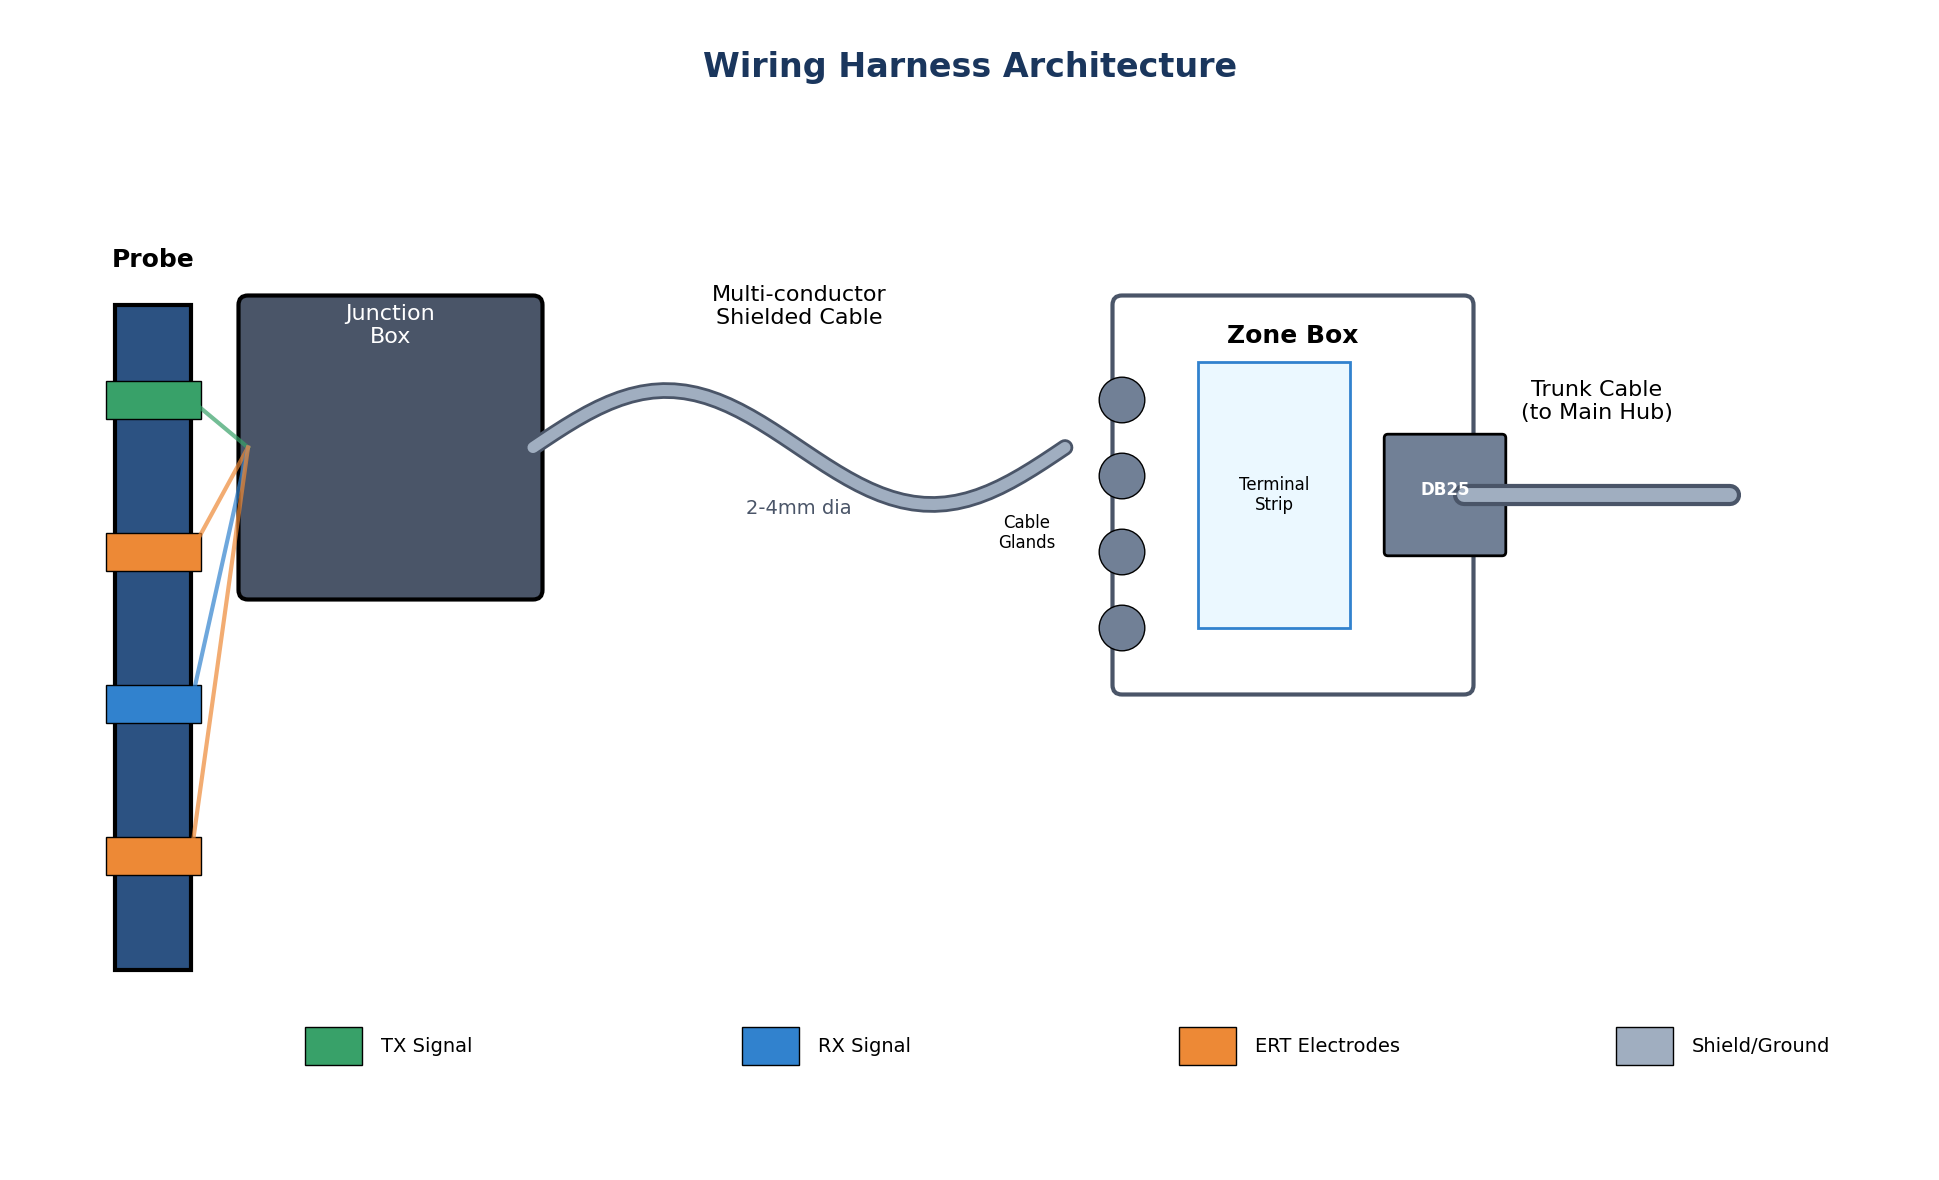

In [3]:
#| label: fig-wiring-harness
#| fig-cap: Wiring harness architecture from probe sensors through junction box and zone box to the main hub. The multi-conductor shielded cable (2-4mm diameter) carries all sensor signals.

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.set_aspect('equal')
ax.axis('off')

# Title
ax.text(5, 5.7, 'Wiring Harness Architecture', fontsize=12,
        fontweight='bold', ha='center', color=COLORS['primary'])

# Probe (Left Side)
ax.add_patch(Rectangle((0.5, 1.0), 0.4, 3.5,
                       facecolor=COLORS['secondary'], edgecolor='black', lw=1.5))
ax.text(0.7, 4.7, 'Probe', ha='center', fontsize=9, fontweight='bold')

# Sensor positions on probe
sensor_info = [
    (4.0, 'TX Coil', COLORS['success']),
    (3.2, 'ERT Ring 1', '#ed8936'),
    (2.4, 'RX Coil', COLORS['accent']),
    (1.6, 'ERT Ring 2', '#ed8936'),
]

for y, label, color in sensor_info:
    ax.add_patch(Rectangle((0.45, y - 0.1), 0.5, 0.2,
                           facecolor=color, edgecolor='black', lw=0.5))

# Junction Box
ax.add_patch(FancyBboxPatch((1.2, 3.0), 1.5, 1.5, boxstyle="round,pad=0.05",
                            facecolor=COLORS['gray_dark'], edgecolor='black', lw=1.5))
ax.text(1.95, 4.3, 'Junction\nBox', ha='center', fontsize=8, color='white')

# Internal connections from probe to junction box
for y, label, color in sensor_info:
    ax.plot([0.9, 1.2], [y, 3.75], color=color, lw=1.5, alpha=0.7)

# Multi-conductor Cable
cable_x = np.linspace(2.7, 5.5, 50)
cable_y = 3.75 + 0.3 * np.sin(np.linspace(0, 2*np.pi, 50))
ax.plot(cable_x, cable_y, color=COLORS['gray_dark'], lw=6, solid_capstyle='round')
ax.plot(cable_x, cable_y, color=COLORS['gray_light'], lw=4, solid_capstyle='round')

ax.text(4.1, 4.4, 'Multi-conductor\nShielded Cable', ha='center', fontsize=8)
ax.annotate('2-4mm dia', xy=(4.1, 3.4), fontsize=7, ha='center', color=COLORS['gray_dark'])

# Zone Box (Right Side)
ax.add_patch(FancyBboxPatch((5.8, 2.5), 1.8, 2.0, boxstyle="round,pad=0.05",
                            facecolor='white', edgecolor=COLORS['gray_dark'], lw=1.5))
ax.text(6.7, 4.3, 'Zone Box', ha='center', fontsize=9, fontweight='bold')

# Cable glands on Zone Box
for i in range(4):
    gy = 2.8 + i * 0.4
    ax.add_patch(Circle((5.8, gy), 0.12, facecolor=COLORS['gray_med'],
                       edgecolor='black', lw=0.5))
ax.text(5.3, 3.3, 'Cable\nGlands', ha='center', fontsize=6, va='center')

# Terminal strip inside Zone Box
ax.add_patch(Rectangle((6.2, 2.8), 0.8, 1.4, facecolor='#ebf8ff',
                       edgecolor=COLORS['accent'], lw=1))
ax.text(6.6, 3.5, 'Terminal\nStrip', ha='center', fontsize=6, va='center')

# Trunk Cable to Hub
ax.plot([7.6, 9.0], [3.5, 3.5], color=COLORS['gray_dark'], lw=8, solid_capstyle='round')
ax.plot([7.6, 9.0], [3.5, 3.5], color=COLORS['gray_light'], lw=5, solid_capstyle='round')
ax.text(8.3, 3.9, 'Trunk Cable\n(to Main Hub)', ha='center', fontsize=8)

# DB25 connector
ax.add_patch(FancyBboxPatch((7.2, 3.2), 0.6, 0.6, boxstyle="round,pad=0.02",
                            facecolor=COLORS['gray_med'], edgecolor='black', lw=1))
ax.text(7.5, 3.5, 'DB25', ha='center', fontsize=6, color='white', fontweight='bold')

# Legend
legend_y = 0.5
legend_items = [
    ('TX Signal', COLORS['success']),
    ('RX Signal', COLORS['accent']),
    ('ERT Electrodes', '#ed8936'),
    ('Shield/Ground', COLORS['gray_light']),
]

for i, (label, color) in enumerate(legend_items):
    lx = 1.5 + i * 2.3
    ax.add_patch(Rectangle((lx, legend_y), 0.3, 0.2, facecolor=color, edgecolor='black', lw=0.5))
    ax.text(lx + 0.4, legend_y + 0.1, label, fontsize=7, va='center')

plt.tight_layout()
plt.show()

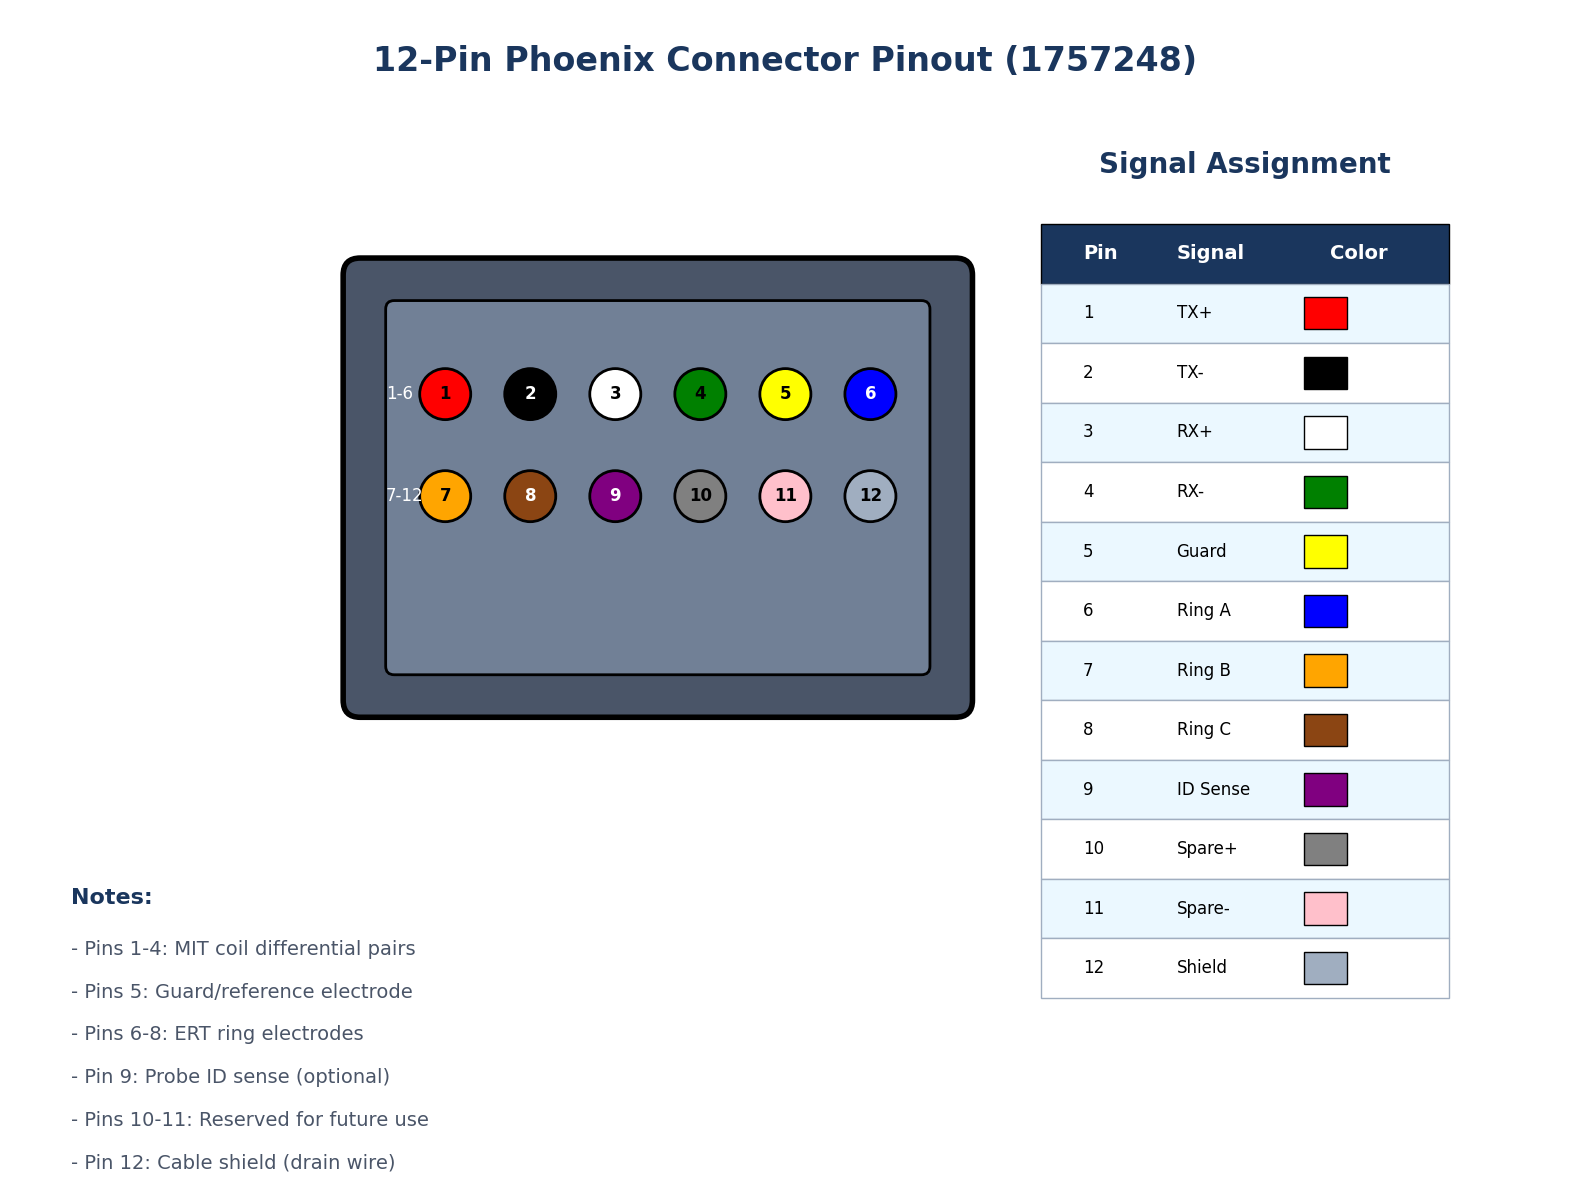

In [4]:
#| label: fig-connector-pinout
#| fig-cap: '12-pin Phoenix connector pinout showing signal assignments and recommended wire colors. Pins 1-4 carry MIT coil differential pairs, pins 6-8 carry ERT electrode signals.'

fig, ax = plt.subplots(figsize=(9, 6))
ax.set_xlim(0, 9)
ax.set_ylim(0, 6)
ax.set_aspect('equal')
ax.axis('off')

# Title
ax.text(4.5, 5.7, '12-Pin Phoenix Connector Pinout (1757248)', fontsize=12,
        fontweight='bold', ha='center', color=COLORS['primary'])

# Connector Body
conn_x, conn_y = 2.0, 2.0
conn_w, conn_h = 3.5, 2.5

# Outer housing
ax.add_patch(FancyBboxPatch((conn_x, conn_y), conn_w, conn_h,
                            boxstyle="round,pad=0.1",
                            facecolor=COLORS['gray_dark'], edgecolor='black', lw=2))

# Inner cavity
ax.add_patch(FancyBboxPatch((conn_x + 0.2, conn_y + 0.2), conn_w - 0.4, conn_h - 0.4,
                            boxstyle="round,pad=0.05",
                            facecolor=COLORS['gray_med'], edgecolor='black', lw=1))

# Pin arrangement (2 rows of 6)
pin_colors = {
    1: ('red', 'TX+'),
    2: ('black', 'TX-'),
    3: ('white', 'RX+'),
    4: ('green', 'RX-'),
    5: ('yellow', 'Guard'),
    6: ('blue', 'Ring A'),
    7: ('orange', 'Ring B'),
    8: ('#8B4513', 'Ring C'),
    9: ('purple', 'ID Sense'),
    10: ('gray', 'Spare+'),
    11: ('pink', 'Spare-'),
    12: (COLORS['gray_light'], 'Shield'),
}

pin_radius = 0.15
for pin in range(1, 13):
    row = (pin - 1) // 6
    col = (pin - 1) % 6
    px = conn_x + 0.5 + col * 0.5
    py = conn_y + conn_h - 0.7 - row * 0.6

    color, _ = pin_colors[pin]
    ax.add_patch(Circle((px, py), pin_radius, facecolor=color,
                       edgecolor='black', lw=1))

    # Pin number
    text_color = 'white' if color in ['black', 'purple', 'blue', '#8B4513'] else 'black'
    ax.text(px, py, str(pin), ha='center', va='center', fontsize=6,
            fontweight='bold', color=text_color)

# Row labels
ax.text(conn_x + 0.15, conn_y + conn_h - 0.7, '1-6', fontsize=6,
        va='center', color='white')
ax.text(conn_x + 0.15, conn_y + conn_h - 1.3, '7-12', fontsize=6,
        va='center', color='white')

# Pinout Table
table_x = 6.0
table_y = 4.8
row_height = 0.35

ax.text(table_x + 1.2, table_y + 0.3, 'Signal Assignment', fontsize=10,
        fontweight='bold', ha='center', color=COLORS['primary'])

# Table header
ax.add_patch(Rectangle((table_x, table_y - row_height), 2.4, row_height,
                       facecolor=COLORS['primary'], edgecolor='black', lw=0.5))
ax.text(table_x + 0.25, table_y - row_height/2, 'Pin', fontsize=7,
        color='white', va='center', fontweight='bold')
ax.text(table_x + 0.8, table_y - row_height/2, 'Signal', fontsize=7,
        color='white', va='center', fontweight='bold')
ax.text(table_x + 1.7, table_y - row_height/2, 'Color', fontsize=7,
        color='white', va='center', fontweight='bold')

# Table rows
for i, (pin, (color, signal)) in enumerate(pin_colors.items()):
    row_y = table_y - (i + 2) * row_height
    bg_color = '#ebf8ff' if i % 2 == 0 else 'white'

    ax.add_patch(Rectangle((table_x, row_y), 2.4, row_height,
                           facecolor=bg_color, edgecolor=COLORS['gray_light'], lw=0.5))

    ax.text(table_x + 0.25, row_y + row_height/2, str(pin), fontsize=6, va='center')
    ax.text(table_x + 0.8, row_y + row_height/2, signal, fontsize=6, va='center')

    # Color swatch
    ax.add_patch(Rectangle((table_x + 1.55, row_y + 0.08), 0.25, row_height - 0.16,
                           facecolor=color, edgecolor='black', lw=0.5))

# Notes
ax.text(0.3, 0.8, 'Notes:', fontsize=8, fontweight='bold', color=COLORS['primary'])
notes = [
    '- Pins 1-4: MIT coil differential pairs',
    '- Pins 5: Guard/reference electrode',
    '- Pins 6-8: ERT ring electrodes',
    '- Pin 9: Probe ID sense (optional)',
    '- Pins 10-11: Reserved for future use',
    '- Pin 12: Cable shield (drain wire)',
]
for i, note in enumerate(notes):
    ax.text(0.3, 0.5 - i * 0.25, note, fontsize=7, color=COLORS['gray_dark'])

plt.tight_layout()
plt.show()

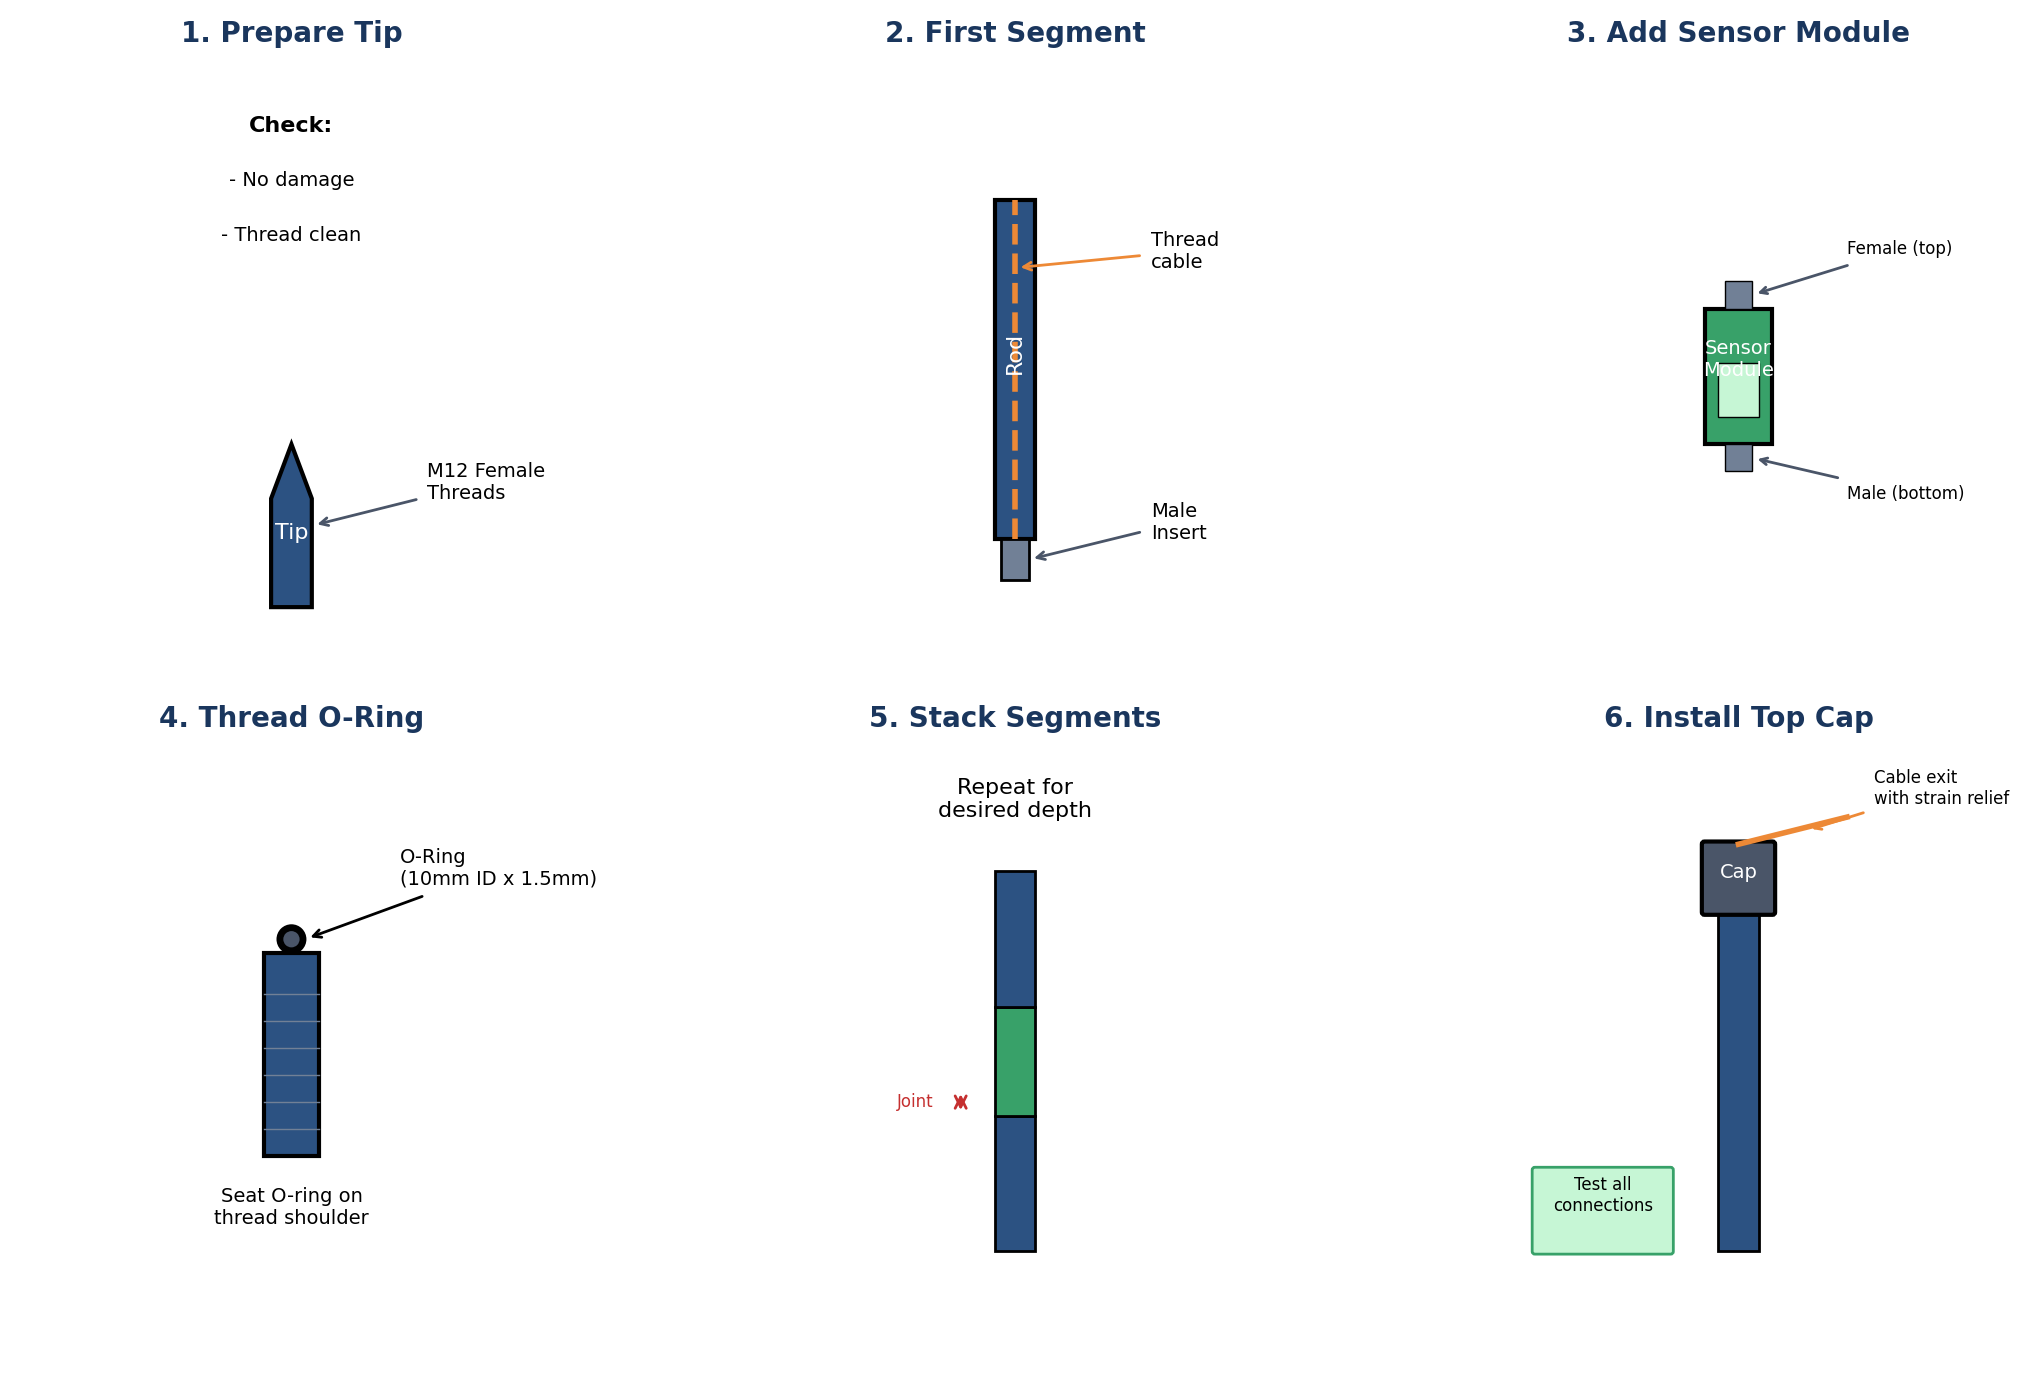

In [5]:
#| label: fig-assembly-sequence
#| fig-cap: 'Six-step assembly sequence: (1) Prepare probe tip, (2) Thread cable through first segment, (3) Add sensor module, (4) Seat O-ring on thread shoulder, (5) Stack additional segments, (6) Install top cap with cable strain relief.'

from matplotlib.patches import Polygon

fig, axes = plt.subplots(2, 3, figsize=(11, 7))

steps = [
    ('1. Prepare Tip', 'tip'),
    ('2. First Segment', 'segment1'),
    ('3. Add Sensor Module', 'sensor'),
    ('4. Thread O-Ring', 'oring'),
    ('5. Stack Segments', 'stack'),
    ('6. Install Top Cap', 'cap'),
]

for ax, (title, step) in zip(axes.flat, steps):
    ax.set_xlim(-2, 2)
    ax.set_ylim(-0.5, 4)
    ax.set_aspect('equal')
    ax.set_title(title, fontsize=10, fontweight='bold', color=COLORS['primary'], pad=8)
    ax.axis('off')

    if step == 'tip':
        # Probe tip
        tip_points = [(-0.15, 0), (0.15, 0), (0.15, 0.8), (0, 1.2), (-0.15, 0.8)]
        ax.add_patch(Polygon(tip_points, facecolor=COLORS['secondary'],
                            edgecolor='black', lw=1.5))
        ax.text(0, 0.5, 'Tip', ha='center', fontsize=8, color='white')
        ax.annotate('M12 Female\nThreads', xy=(0.15, 0.6), xytext=(1.0, 0.8),
                   fontsize=7, arrowprops=dict(arrowstyle='->', color=COLORS['gray_dark']))
        ax.text(0, 3.5, 'Check:', fontsize=8, fontweight='bold', ha='center')
        ax.text(0, 3.1, '- No damage', fontsize=7, ha='center')
        ax.text(0, 2.7, '- Thread clean', fontsize=7, ha='center')

    elif step == 'segment1':
        ax.add_patch(Rectangle((-0.15, 0.5), 0.3, 2.5,
                              facecolor=COLORS['secondary'], edgecolor='black', lw=1.5))
        ax.text(0, 1.75, 'Rod', ha='center', fontsize=8, color='white', rotation=90)
        ax.add_patch(Rectangle((-0.1, 0.2), 0.2, 0.3,
                              facecolor=COLORS['gray_med'], edgecolor='black', lw=1))
        ax.annotate('Male\nInsert', xy=(0.1, 0.35), xytext=(1.0, 0.5),
                   fontsize=7, arrowprops=dict(arrowstyle='->', color=COLORS['gray_dark']))
        ax.plot([0, 0], [0.5, 3.0], color='#ed8936', lw=2, linestyle='--')
        ax.annotate('Thread\ncable', xy=(0, 2.5), xytext=(1.0, 2.5),
                   fontsize=7, arrowprops=dict(arrowstyle='->', color='#ed8936'))

    elif step == 'sensor':
        ax.add_patch(Rectangle((-0.25, 1.2), 0.5, 1.0,
                              facecolor=COLORS['success'], edgecolor='black', lw=1.5))
        ax.text(0, 1.7, 'Sensor\nModule', ha='center', fontsize=7, color='white')
        ax.add_patch(Rectangle((-0.15, 1.4), 0.3, 0.4,
                              facecolor='#c6f6d5', edgecolor='black', lw=0.5))
        ax.add_patch(Rectangle((-0.1, 1.0), 0.2, 0.2,
                              facecolor=COLORS['gray_med'], edgecolor='black', lw=0.5))
        ax.add_patch(Rectangle((-0.1, 2.2), 0.2, 0.2,
                              facecolor=COLORS['gray_med'], edgecolor='black', lw=0.5))
        ax.annotate('Female (top)', xy=(0.1, 2.3), xytext=(0.8, 2.6),
                   fontsize=6, arrowprops=dict(arrowstyle='->', color=COLORS['gray_dark']))
        ax.annotate('Male (bottom)', xy=(0.1, 1.1), xytext=(0.8, 0.8),
                   fontsize=6, arrowprops=dict(arrowstyle='->', color=COLORS['gray_dark']))

    elif step == 'oring':
        ax.add_patch(Rectangle((-0.2, 1.0), 0.4, 1.5,
                              facecolor=COLORS['secondary'], edgecolor='black', lw=1.5))
        for i in range(6):
            ty = 1.2 + i * 0.2
            ax.plot([-0.2, 0.2], [ty, ty], color=COLORS['gray_med'], lw=0.5)
        ax.add_patch(Circle((0, 2.6), 0.1, facecolor='black', edgecolor='black'))
        ax.add_patch(Circle((0, 2.6), 0.06, facecolor=COLORS['gray_dark']))
        ax.annotate('O-Ring\n(10mm ID x 1.5mm)', xy=(0.1, 2.6), xytext=(0.8, 3.0),
                   fontsize=7, arrowprops=dict(arrowstyle='->', color='black'))
        ax.text(0, 0.5, 'Seat O-ring on\nthread shoulder', ha='center', fontsize=7)

    elif step == 'stack':
        segment_colors = [COLORS['secondary'], COLORS['success'], COLORS['secondary']]
        segment_labels = ['Segment', 'Sensor', 'Segment']
        y_pos = 0.3
        for i, (color, label) in enumerate(zip(segment_colors, segment_labels)):
            height = 0.8 if label == 'Sensor' else 1.0
            ax.add_patch(Rectangle((-0.15, y_pos), 0.3, height,
                                   facecolor=color, edgecolor='black', lw=1))
            y_pos += height
        ax.annotate('', xy=(-0.4, 1.3), xytext=(-0.4, 1.5),
                   arrowprops=dict(arrowstyle='<->', color=COLORS['warning']))
        ax.text(-0.6, 1.4, 'Joint', fontsize=6, va='center', ha='right',
                color=COLORS['warning'])
        ax.text(0, 3.5, 'Repeat for\ndesired depth', ha='center', fontsize=8)

    elif step == 'cap':
        ax.add_patch(Rectangle((-0.15, 0.3), 0.3, 2.5,
                              facecolor=COLORS['secondary'], edgecolor='black', lw=1))
        ax.add_patch(FancyBboxPatch((-0.25, 2.8), 0.5, 0.5, boxstyle="round,pad=0.02",
                                    facecolor=COLORS['gray_dark'], edgecolor='black', lw=1.5))
        ax.text(0, 3.05, 'Cap', ha='center', fontsize=7, color='white')
        ax.plot([0, 0.8], [3.3, 3.5], color='#ed8936', lw=2)
        ax.annotate('Cable exit\nwith strain relief', xy=(0.5, 3.4), xytext=(1.0, 3.6),
                   fontsize=6, arrowprops=dict(arrowstyle='->', color='#ed8936'))
        ax.add_patch(FancyBboxPatch((-1.5, 0.3), 1.0, 0.6, boxstyle="round,pad=0.02",
                                    facecolor='#c6f6d5', edgecolor=COLORS['success']))
        ax.text(-1.0, 0.6, 'Test all\nconnections', ha='center', fontsize=6)

plt.tight_layout()
plt.show()

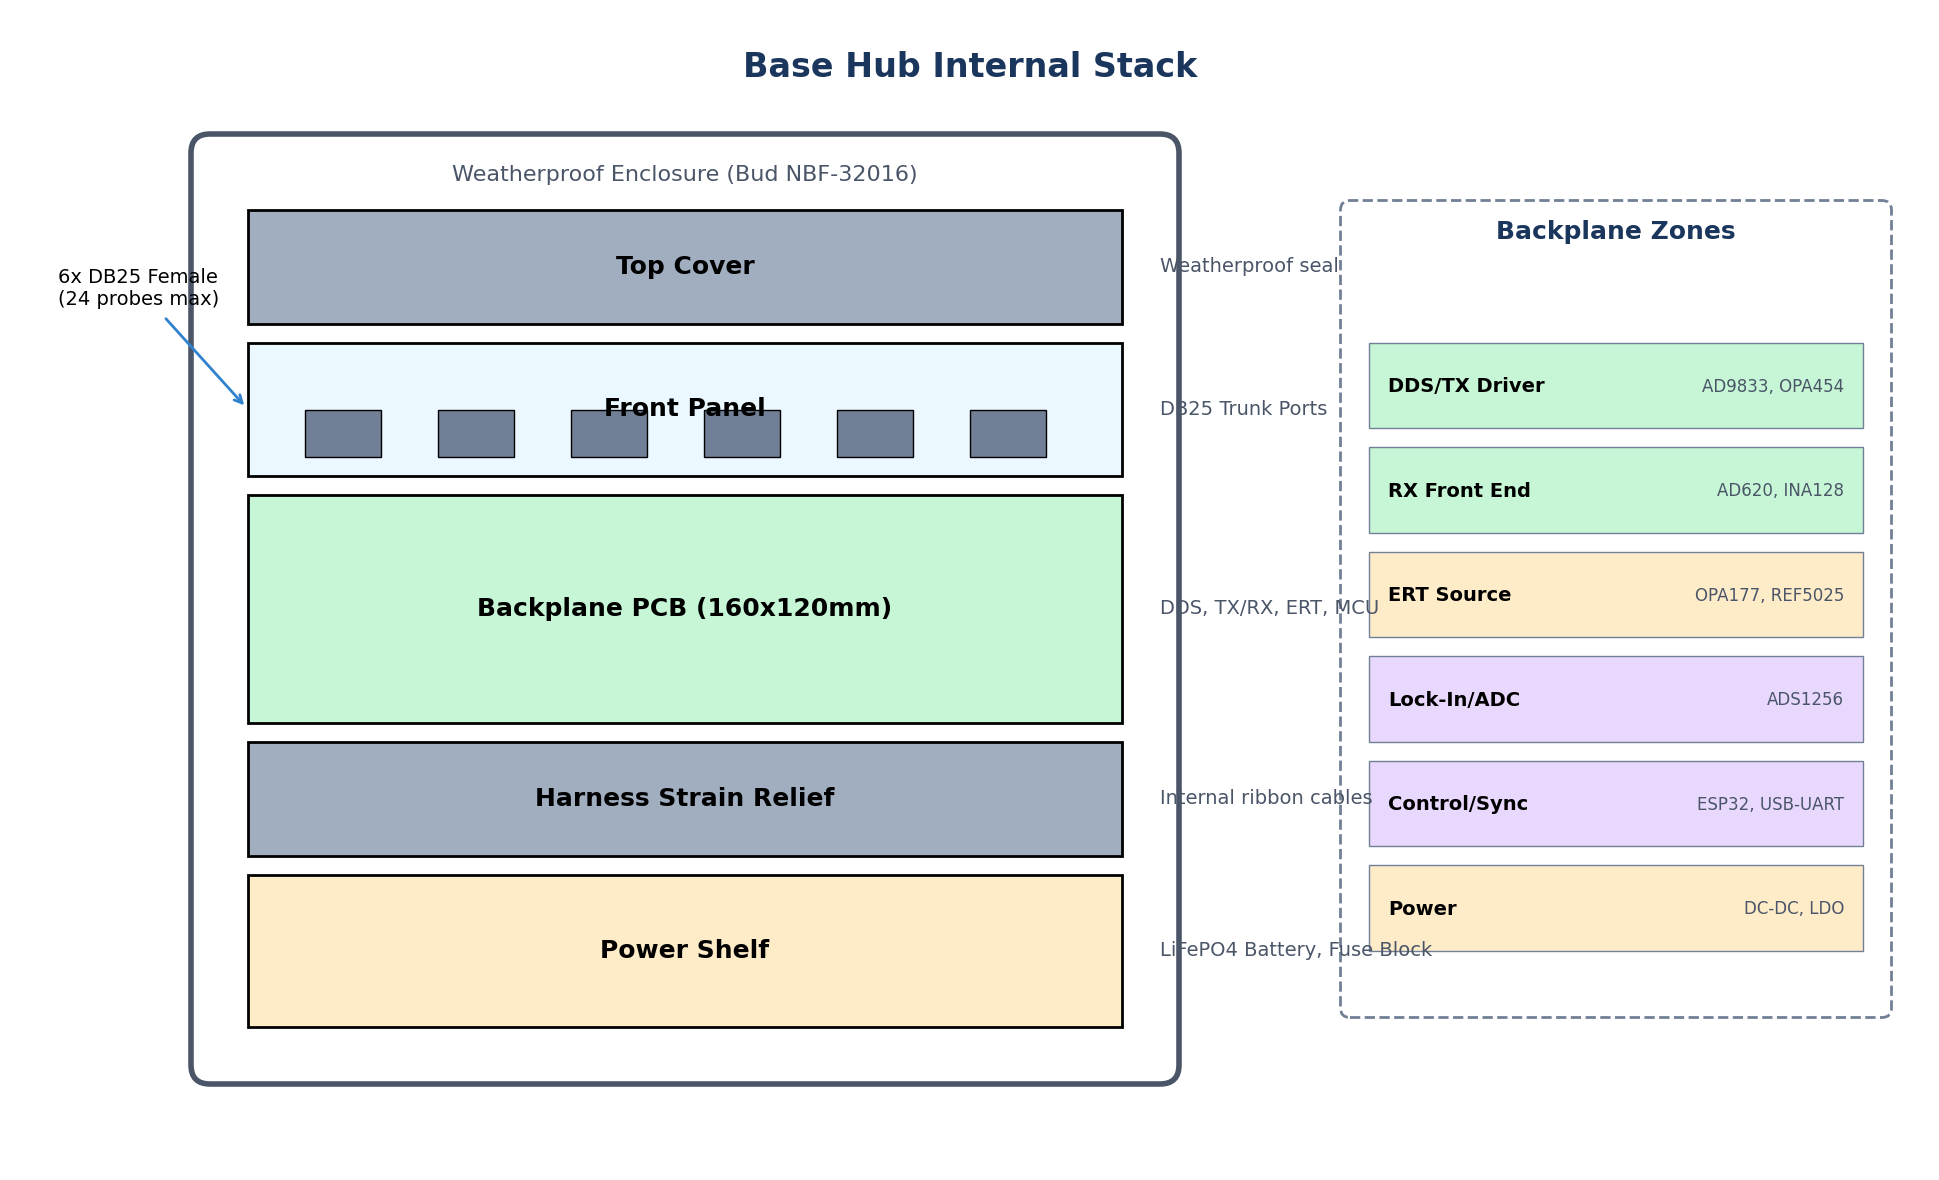

In [6]:
#| label: fig-base-hub-stack
#| fig-cap: Base hub internal stack layout showing the layered architecture from power shelf at bottom to weatherproof cover at top. The backplane PCB contains all analog and digital circuits.

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.set_aspect('equal')
ax.axis('off')

# Title
ax.text(5, 5.7, 'Base Hub Internal Stack', fontsize=12,
        fontweight='bold', ha='center', color=COLORS['primary'])

# Enclosure Outline
ax.add_patch(FancyBboxPatch((1.0, 0.5), 5.0, 4.8, boxstyle="round,pad=0.1",
                            facecolor='white', edgecolor=COLORS['gray_dark'], lw=2))
ax.text(3.5, 5.15, 'Weatherproof Enclosure (Bud NBF-32016)',
        ha='center', fontsize=8, color=COLORS['gray_dark'])

# Stack layers (bottom to top)
stack_layers = [
    (0.7, 0.8, 'Power Shelf', '#feebc8', 'LiFePO4 Battery, Fuse Block'),
    (1.6, 0.6, 'Harness Strain Relief', COLORS['gray_light'], 'Internal ribbon cables'),
    (2.3, 1.2, 'Backplane PCB (160x120mm)', '#c6f6d5', 'DDS, TX/RX, ERT, MCU'),
    (3.6, 0.7, 'Front Panel', '#ebf8ff', 'DB25 Trunk Ports'),
    (4.4, 0.6, 'Top Cover', COLORS['gray_light'], 'Weatherproof seal'),
]

for y, h, name, color, desc in stack_layers:
    ax.add_patch(Rectangle((1.2, y), 4.6, h,
                           facecolor=color, edgecolor='black', lw=1))
    ax.text(3.5, y + h/2, name, ha='center', va='center',
            fontsize=9, fontweight='bold')
    ax.text(6.0, y + h/2, desc, va='center', fontsize=7, color=COLORS['gray_dark'])

# Backplane Detail (Right Side)
detail_x = 7.0
ax.add_patch(FancyBboxPatch((detail_x, 0.8), 2.8, 4.2, boxstyle="round,pad=0.05",
                            facecolor='white', edgecolor=COLORS['gray_med'], lw=1,
                            linestyle='--'))
ax.text(detail_x + 1.4, 4.85, 'Backplane Zones', ha='center', fontsize=9,
        fontweight='bold', color=COLORS['primary'])

backplane_zones = [
    ('DDS/TX Driver', '#c6f6d5', 'AD9833, OPA454'),
    ('RX Front End', '#c6f6d5', 'AD620, INA128'),
    ('ERT Source', '#feebc8', 'OPA177, REF5025'),
    ('Lock-In/ADC', '#e9d8fd', 'ADS1256'),
    ('Control/Sync', '#e9d8fd', 'ESP32, USB-UART'),
    ('Power', '#feebc8', 'DC-DC, LDO'),
]

zone_y = 4.4
for name, color, parts in backplane_zones:
    zone_y -= 0.55
    ax.add_patch(Rectangle((detail_x + 0.1, zone_y), 2.6, 0.45,
                           facecolor=color, edgecolor=COLORS['gray_med'], lw=0.5))
    ax.text(detail_x + 0.2, zone_y + 0.22, name, fontsize=7, va='center', fontweight='bold')
    ax.text(detail_x + 2.6, zone_y + 0.22, parts, fontsize=6, va='center',
            ha='right', color=COLORS['gray_dark'])

# Front Panel Detail
ax.annotate('6x DB25 Female\n(24 probes max)', xy=(1.2, 3.95), xytext=(0.2, 4.5),
            fontsize=7, arrowprops=dict(arrowstyle='->', color=COLORS['accent']))

# Connector symbols on front panel layer
for i in range(6):
    cx = 1.5 + i * 0.7
    ax.add_patch(Rectangle((cx, 3.7), 0.4, 0.25,
                           facecolor=COLORS['gray_med'], edgecolor='black', lw=0.5))

plt.tight_layout()
plt.show()